In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import read_data, generate_data, lstm_model

In [55]:
LOG_DIR = '../logs/sin'
TIMESTEPS = 45
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [56]:
regressor = learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),
                            model_dir=LOG_DIR)

In [57]:
X, y = generate_data(np.cos, np.linspace(1000, 3000, 600), TIMESTEPS, seperate=False)
#X, y  = read_data('TATAMOTORS', 'Close', TIMESTEPS, seperate=False)


# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=5000)
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)


Estimator(params=None)

In [19]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

prediction: Tensor("linear_regression/mean_squared_error_regressor/Squeeze:0", shape=(?,), dtype=float32)
loss: Tensor("linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0", shape=(), dtype=float32)
MSE: 0.079898


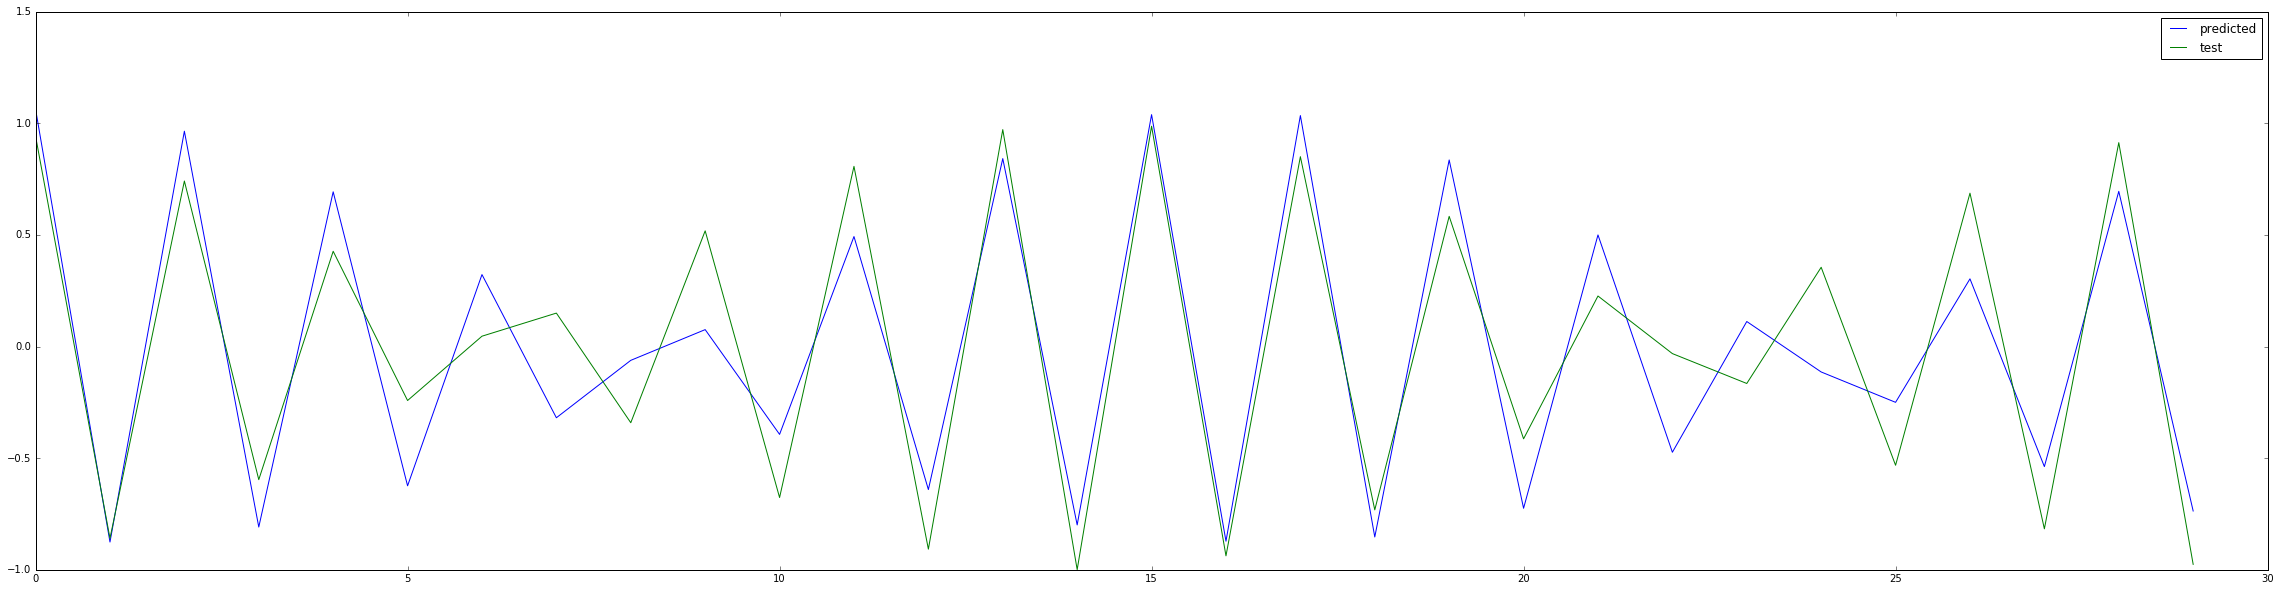

In [20]:
plt.figure(figsize=(40,10))
#plt.semilogy(color='purple', linewidth = 2)

plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')

plt.legend(handles=[plot_predicted, plot_test])


# Omair's Test Code

In [20]:
import lstm
lstm = reload(lstm)
from lstm import read_data
read_data('CAIRN', 'Open', TIMESTEPS, seperate=False)

train x
[[[ 199.  ]
  [ 198.15]
  [ 195.15]]

 [[ 198.15]
  [ 195.15]
  [ 195.15]]

 [[ 195.15]
  [ 195.15]
  [ 191.1 ]]

 ..., 
 [[ 134.  ]
  [ 134.  ]
  [ 133.  ]]

 [[ 134.  ]
  [ 133.  ]
  [ 143.25]]

 [[ 133.  ]
  [ 143.25]
  [ 135.  ]]]
val_x
[[[ 138.  ]
  [ 136.  ]
  [ 126.  ]]

 [[ 136.  ]
  [ 126.  ]
  [ 131.9 ]]

 [[ 126.  ]
  [ 131.9 ]
  [ 136.1 ]]

 [[ 131.9 ]
  [ 136.1 ]
  [ 132.  ]]

 [[ 136.1 ]
  [ 132.  ]
  [ 138.1 ]]

 [[ 132.  ]
  [ 138.1 ]
  [ 142.  ]]

 [[ 138.1 ]
  [ 142.  ]
  [ 140.  ]]

 [[ 142.  ]
  [ 140.  ]
  [ 158.1 ]]

 [[ 140.  ]
  [ 158.1 ]
  [ 148.  ]]

 [[ 158.1 ]
  [ 148.  ]
  [ 131.5 ]]

 [[ 148.  ]
  [ 131.5 ]
  [ 136.9 ]]

 [[ 131.5 ]
  [ 136.9 ]
  [ 150.  ]]

 [[ 136.9 ]
  [ 150.  ]
  [ 137.  ]]

 [[ 150.  ]
  [ 137.  ]
  [ 135.  ]]

 [[ 137.  ]
  [ 135.  ]
  [ 120.45]]

 [[ 135.  ]
  [ 120.45]
  [ 114.5 ]]

 [[ 120.45]
  [ 114.5 ]
  [ 105.05]]

 [[ 114.5 ]
  [ 105.05]
  [ 114.9 ]]

 [[ 105.05]
  [ 114.9 ]
  [ 145.25]]

 [[ 114.9 ]
  [ 145.25]
  [ 1

({'test': array([[[ 249.8 ],
          [ 258.7 ],
          [ 249.5 ]],
  
         [[ 258.7 ],
          [ 249.5 ],
          [ 243.1 ]],
  
         [[ 249.5 ],
          [ 243.1 ],
          [ 243.5 ]],
  
         [[ 243.1 ],
          [ 243.5 ],
          [ 234.95]],
  
         [[ 243.5 ],
          [ 234.95],
          [ 226.  ]],
  
         [[ 234.95],
          [ 226.  ],
          [ 219.  ]],
  
         [[ 226.  ],
          [ 219.  ],
          [ 220.15]],
  
         [[ 219.  ],
          [ 220.15],
          [ 216.  ]],
  
         [[ 220.15],
          [ 216.  ],
          [ 225.  ]],
  
         [[ 216.  ],
          [ 225.  ],
          [ 222.  ]],
  
         [[ 225.  ],
          [ 222.  ],
          [ 222.  ]],
  
         [[ 222.  ],
          [ 222.  ],
          [ 215.  ]],
  
         [[ 222.  ],
          [ 215.  ],
          [ 215.5 ]],
  
         [[ 215.  ],
          [ 215.5 ],
          [ 217.5 ]],
  
         [[ 215.5 ],
          [ 217.5 ],
          [ 

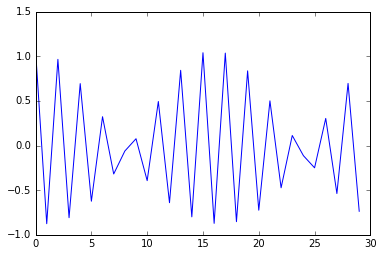

In [48]:
plt.plot(predicted)

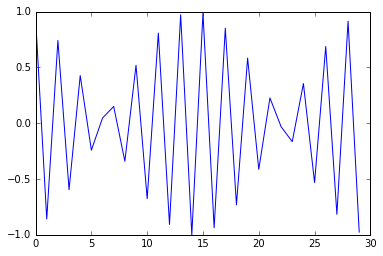

In [21]:
plt.plot(y['test'])

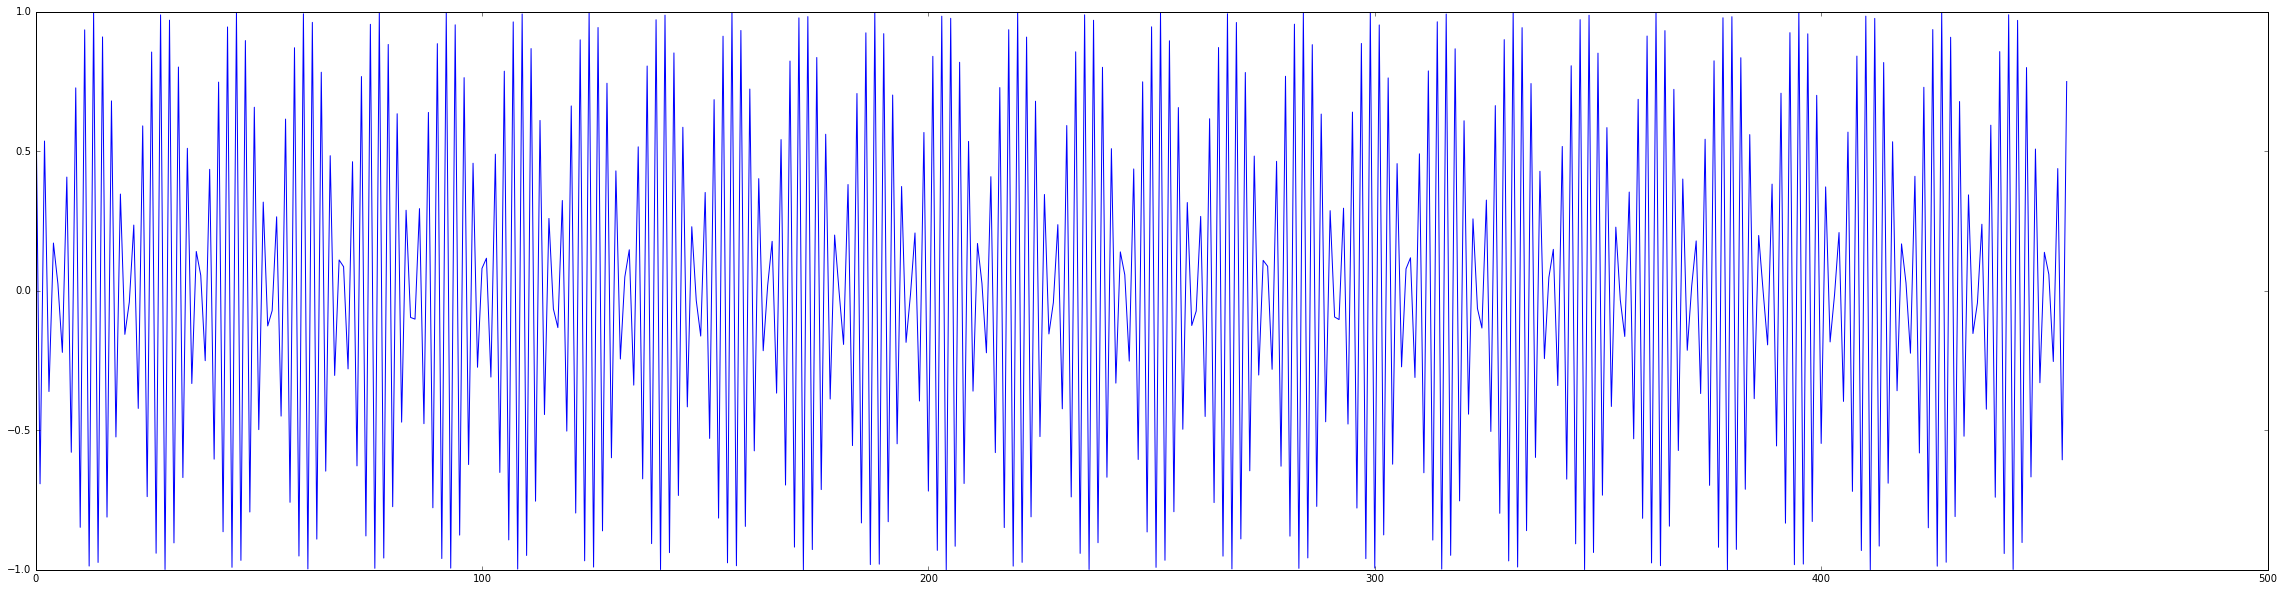

In [31]:
plt.figure(figsize=(40,10))
plt.plot(y['train'])

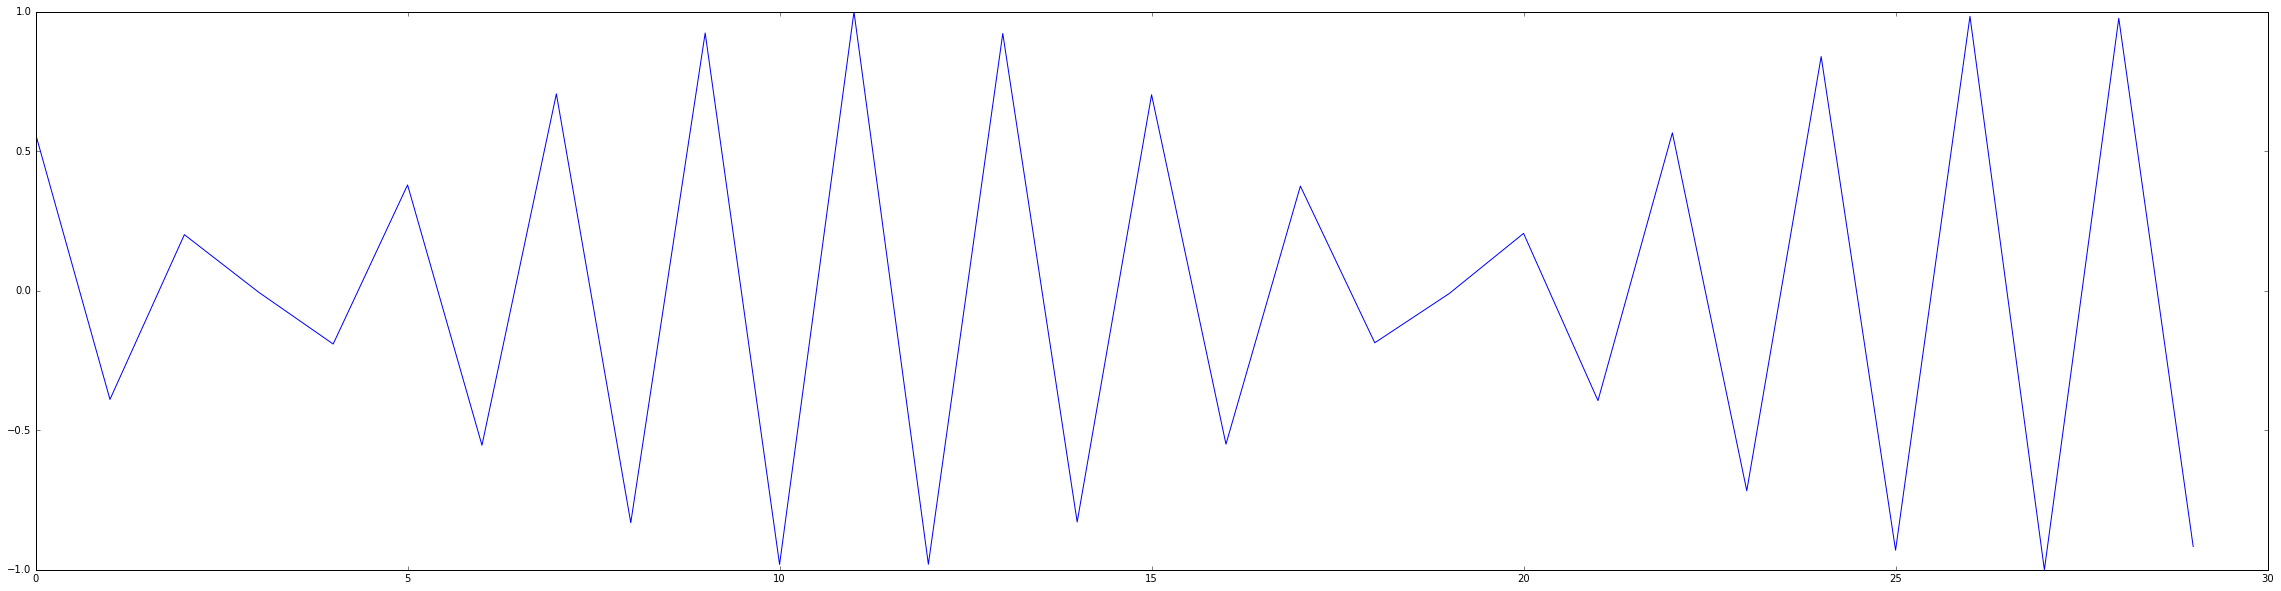

In [37]:
plt.figure(figsize=(40,10))
plt.plot(X['train'][0])

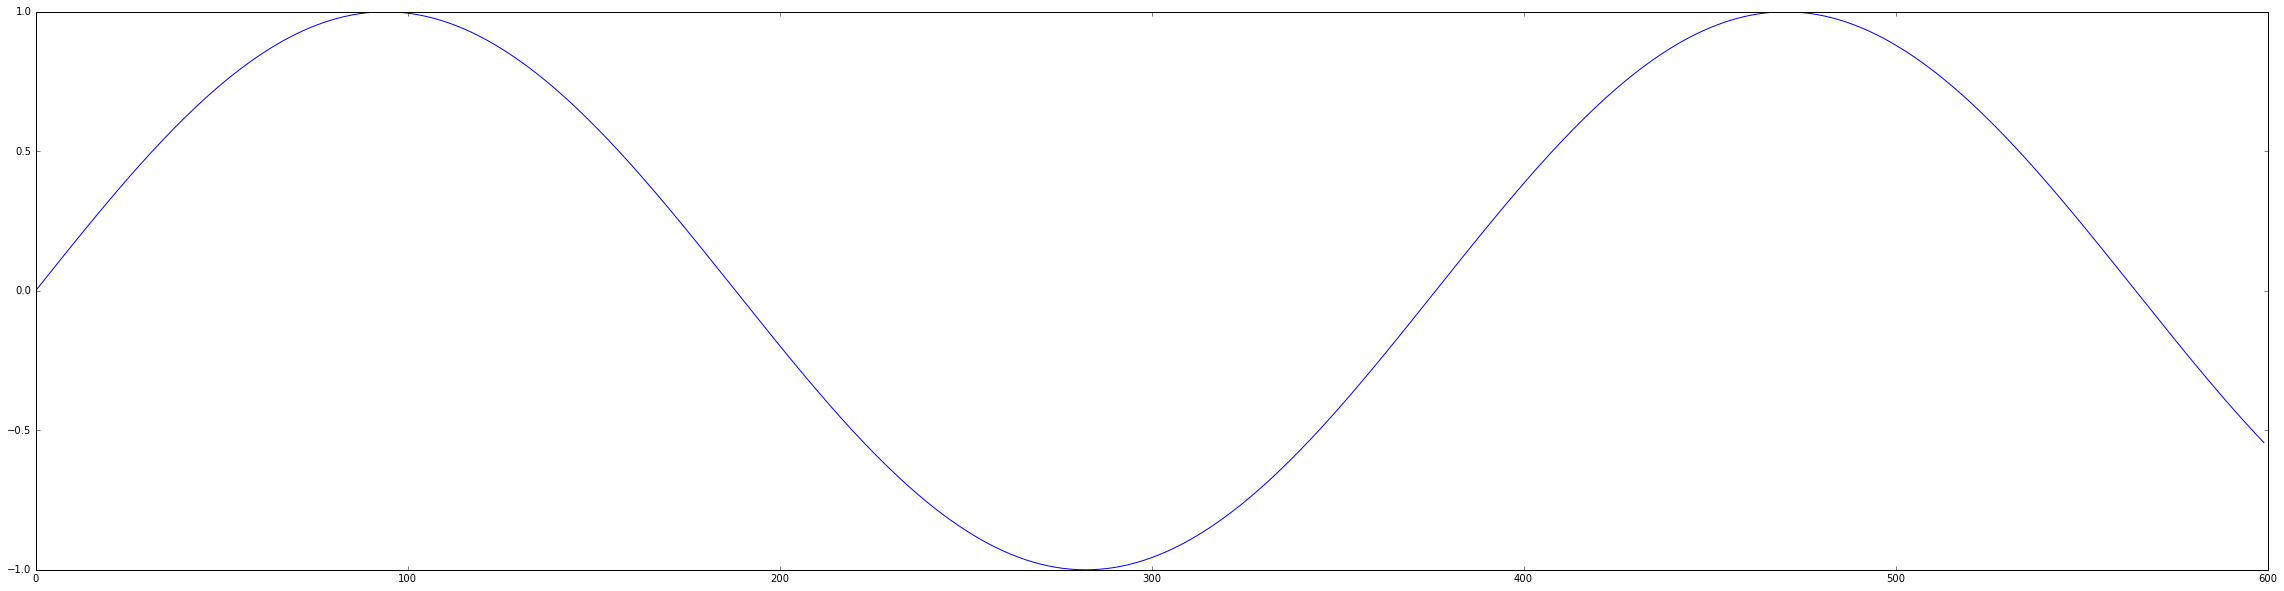

In [47]:
plt.figure(figsize=(40,10))
plt.plot(np.sin(np.linspace(0, 10, 600)))